<a href="https://colab.research.google.com/gist/imransalam/463b75beecdbff629c2deca204c83bca/tf_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **some tensorflow stuff....**

---



Please Go to Runtime type and change environment to Python3.

---


You can change the hardware accelerator to GPU too (if your luck is good enough)



---

The code written below does not follow "Good Coding Practices". This was made for a step by step guide. Hence a lot of things would be repeating.

In [0]:
import numpy as np
import tensorflow as tf
from sklearn import metrics

## **Constants**

In [0]:
'''
    Some basic Mathematics Operations Over Constants
'''

# CREATE GRAPH
basic_addition_graph = tf.Graph()
with basic_addition_graph.as_default():
    a = tf.constant(value=[ 2, 5, 7], 
                    name="a", 
                    dtype=tf.int8, 
                    shape=(3,), 
                    verify_shape=True)
    
    b = tf.constant(value=[ 1, -2, -4], 
                    name="b", 
                    dtype=tf.int8, 
                    shape=(3,), 
                    verify_shape=True)
    
    c = tf.constant(value=[[ -4, -1, 2], [ -4, -1, 2]], 
                name="c", 
                dtype=tf.int8, 
                shape=(2,3), 
                verify_shape=True)
    
    
    x = tf.add(a, b)
    y = tf.multiply(x , c) # BROADCASTING, (3, ) X (2,3)
    

# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=basic_addition_graph) as sess:
    
    # writer = tf.summary.FileWriter('basic_addition_graph', sess.graph)
    # tensorboard --logdir="basic_addition_graph" --port 8000
    
    print(sess.run([x, y])) # Providing No feed_dict, No Placeholder in the graph

[array([3, 3, 3], dtype=int8), array([[-12,  -3,   6],
       [-12,  -3,   6]], dtype=int8)]


## **Placeholders**

In [0]:
'''
    Some basic Mathematics Operations Over Placeholders
'''

# CREATE GRAPH
basic_addition_graph = tf.Graph()
with basic_addition_graph.as_default():
    a = tf.placeholder(name="a", 
                    dtype=tf.int8, 
                    shape=(3,))
    
    b = tf.placeholder(name="b", 
                    dtype=tf.int8, 
                    shape=(3,))
    
    c = tf.constant(value=[[ -4, -1, 2], [ -4, -1, 2]], 
                name="c", 
                dtype=tf.int8, 
                shape=(2,3), 
                verify_shape=True)
    
    
    x = tf.add(a, b)
    y = tf.multiply(x , c) # BROADCASTING, (3, ) X (2,3)
    

# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=basic_addition_graph) as sess:
    
    # writer = tf.summary.FileWriter('basic_addition_graph', sess.graph)
    # tensorboard --logdir="basic_addition_graph" --port 8000
    
    print( sess.run([x, y], feed_dict={a:[ 2, 5, 7], b:[ 1, -2, -4]}) )

[array([3, 3, 3], dtype=int8), array([[-12,  -3,   6],
       [-12,  -3,   6]], dtype=int8)]


## **Variables**

In [0]:
'''
    Some basic Mathematics Operations Over Placeholders and Variables
'''

# WHY VARIABLES?
# WE WANT A MATRIX/VECTOR THAT CAN BE OPTIMIZED.


# DIFFERENCE IN VARIABLES TYPE THAN PLACEHOLDERS OR CONSTANTS?
# CONSTANTS AND PLACEHOLDERS ARE OPS. THEY ARE SIMPLY SCALARS / VECTORS / MATRICES / TENSORS. 
# VARIABLE ON THE OTHER HAND IS A CLASS. IT HAS ITS OWN METHODS DEFINED INSIDE IT.
# HENCE YOU WOULD NOTICE THE INITIAL OF VARIABLE IS IN CAPITAL.

# CREATE GRAPH
basic_graph = tf.Graph()
with basic_graph.as_default():
    a = tf.placeholder(name="a",
                    dtype=tf.float32,
                    shape=(None,5))
    
    
    W = tf.Variable(tf.random_normal((5, 3)), name="W") # INITIALIZE IT WITH RANDOM
    b = tf.Variable(tf.random_normal((3,)), name="b") # INITIALIZE IT WITH RANDOM
    
    y = tf.add(tf.matmul(a, W), b)
    

# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=basic_graph) as sess:
    
    # writer = tf.summary.FileWriter('basic_addition_graph', sess.graph)
    # tensorboard --logdir="basic_addition_graph" --port 8000
    init = tf.global_variables_initializer()
    sess.run(init)
    print( sess.run(y, feed_dict={a: np.random.uniform(size=(500, 5)) }) )
    print('-' * 20)
    print(b.eval())

[[1.739159   1.1435039  1.5349289 ]
 [1.1710117  1.4256032  1.5753393 ]
 [2.264703   0.75571954 1.3597436 ]
 ...
 [2.8382485  0.7648671  1.9334944 ]
 [2.087041   1.2666237  2.5543098 ]
 [1.6948155  2.1569772  2.3694232 ]]
--------------------
[ 1.5039895  -0.19186825  0.3403521 ]


## **Start Some Training**

In [0]:
'''
    Training Over Boston Housing. Its a simple Linear regression :/
'''

# LOAD DATASET
dataset = tf.keras.datasets.boston_housing
(x_train, y_train), (x_val, y_val) = dataset.load_data()

# CONFIGURE
lr = 1e-7
show_every = 1000
epochs = 10000

# CREATE GRAPH
basic_linear_regression_graph = tf.Graph()
with basic_linear_regression_graph.as_default():
    
    x = tf.placeholder(name="x",
                    dtype=tf.float64)
    
    y = tf.placeholder(name="y",
                    dtype=tf.float64)
    
    W = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64), name="W") # INITIALIZE IT WITH RANDOM
    b = tf.Variable(tf.zeros(1, dtype = tf.float64), name="b") # INITIALIZE IT WITH RANDOM
    
    y_hat = tf.add(tf.matmul(x, W), b)
    loss = tf.reduce_mean(tf.square(y - y_hat))
    
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss) # Try Adam with bigger lr
    

# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=basic_linear_regression_graph) as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(epochs): # EPOCHS  1ep is one iteration over complete Dataset.
        sess.run(optimizer, feed_dict={x: x_train, y: y_train})
        if i % show_every == 0:
            cur_loss_train = sess.run(loss, feed_dict={x: x_train, y: y_train})
            cur_loss_val = sess.run(loss, feed_dict={x: x_val, y: y_val})
            print("Training loss at Epoch # ", i, " is : ", cur_loss_train / y_train.shape[0])
            print("Validation loss at Epoch # ", i, " is : ", cur_loss_val / y_val.shape[0])
            print('-' * 45)
            
        

57344/57026 [==============================] - 0s 0us/step
Training loss at Epoch #  0  is :  370.0406052246812
Validation loss at Epoch #  0  is :  1483.314488482391
---------------------------------------------
Training loss at Epoch #  1000  is :  1.6799104722119447
Validation loss at Epoch #  1000  is :  5.530671860368268
---------------------------------------------
Training loss at Epoch #  2000  is :  1.5568439210871277
Validation loss at Epoch #  2000  is :  5.028803758578608
---------------------------------------------
Training loss at Epoch #  3000  is :  1.4561101405198131
Validation loss at Epoch #  3000  is :  4.593574454026101
---------------------------------------------
Training loss at Epoch #  4000  is :  1.3690914593086776
Validation loss at Epoch #  4000  is :  4.224590411287281
---------------------------------------------
Training loss at Epoch #  5000  is :  1.29333636534445
Validation loss at Epoch #  5000  is :  3.909977421834976
------------------------------

## **Define Custom loss with Condition**
**Huber Loss**

A little Intuituin behind it:

If the distance between predicted and original is lesser than some delta use the squared loss, otherwise use the absolute difference to cater for the outliers.

Let's see how we can make a conditional statement like this in tensorflow.

\begin{equation*}
L_\delta (y,f(x)) = \begin{vmatrix}
1/2(y-f(x))^2 for |y - f(x)| \leq \delta, \\
\delta|y-f(x)| - 1/2\delta^2 Otherwise\\
\end{vmatrix}
\end{equation*}

In [0]:
'''
    Training Over Boston Housing. Its a simple Linear regression with conditional Loss
'''

# LOAD DATASET
dataset = tf.keras.datasets.boston_housing
(x_train, y_train), (x_val, y_val) = dataset.load_data()

# CONFIGURE
lr = 1e-7
show_every = 1000
epochs = 10000

# CREATE GRAPH
basic_linear_regression_graph = tf.Graph()
with basic_linear_regression_graph.as_default():
    
    def huber_loss(labels, predicted, delta=1.0):
        tf_delta = tf.constant(value=delta, dtype=tf.float64)
        residual = tf.reduce_mean(tf.abs(predicted - labels))
        condition = tf.less(residual, tf_delta)
        small_res = 0.5 * tf.square(residual)
        large_res = tf_delta * residual - 0.5 * tf.square(tf_delta)
        return tf.where(condition, small_res, large_res)
        
    
    x = tf.placeholder(name="x",
                    dtype=tf.float64)
    
    y = tf.placeholder(name="y",
                    dtype=tf.float64)
    
    W = tf.Variable(tf.truncated_normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float64), name="W") # INITIALIZE IT WITH RANDOM
    b = tf.Variable(tf.zeros(1, dtype = tf.float64), name="b") # INITIALIZE IT WITH RANDOM
    
    y_hat = tf.add(tf.matmul(x, W), b)
    loss = huber_loss(y, y_hat, delta=1.0)
#     print(loss)
    
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss) # Try Adam with bigger lr
    

# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=basic_linear_regression_graph) as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(epochs): # EPOCHS  1ep is one iteration over complete Dataset.
        sess.run(optimizer, feed_dict={x: x_train, y: y_train})
        if i % show_every == 0:
            cur_loss_train = sess.run(loss, feed_dict={x: x_train, y: y_train})
            cur_loss_val = sess.run(loss, feed_dict={x: x_val, y: y_val})
            print("Training loss at Epoch # ", i, " is : ", cur_loss_train / y_train.shape[0])
            print("Validation loss at Epoch # ", i, " is : ", cur_loss_val / y_val.shape[0])
            print('-' * 45)
            
        

Training loss at Epoch #  0  is :  2.1908339990975128
Validation loss at Epoch #  0  is :  8.907859305382098
---------------------------------------------
Training loss at Epoch #  1000  is :  2.1174914995179175
Validation loss at Epoch #  1000  is :  8.609640281803092
---------------------------------------------
Training loss at Epoch #  2000  is :  2.0441489999382774
Validation loss at Epoch #  2000  is :  8.311421258224081
---------------------------------------------
Training loss at Epoch #  3000  is :  1.9708065003587472
Validation loss at Epoch #  3000  is :  8.013202234645041
---------------------------------------------
Training loss at Epoch #  4000  is :  1.8974640007792105
Validation loss at Epoch #  4000  is :  7.714983211066019
---------------------------------------------
Training loss at Epoch #  5000  is :  1.8241215011995957
Validation loss at Epoch #  5000  is :  7.416764187486983
---------------------------------------------
Training loss at Epoch #  6000  is :  1.

## **Classification with Logistic Regression**

In [0]:
'''
    Training Over MNIST
'''

# LOAD DATASET
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


# CONFIGURE
lr = 1e-3
batch_size = 128
epochs = 150

# CREATE GRAPH
basic_logistic_regression_graph = tf.Graph()
with basic_logistic_regression_graph.as_default():
    
    x = tf.placeholder(name="x",
                    shape=(None, 784),
                    dtype=tf.float32)
    
    y = tf.placeholder(name="y",
                    shape=(None, 10),
                    dtype=tf.float32)
    
    W = tf.Variable(tf.truncated_normal([ 784, 10], mean=0.0, stddev=1.0, dtype=tf.float32), name="W")
    b = tf.Variable(tf.zeros(10, dtype = tf.float32), name="b") 
    
    logits = tf.add(tf.matmul(x, W), b)
    
    loss_for_each_sample = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
    
    loss = tf.reduce_mean(loss_for_each_sample)
    
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss) 
    

# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=basic_logistic_regression_graph) as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(epochs): # EPOCHS  1ep is one iteration over complete Dataset.
        
        n_batches = int(mnist.train.num_examples / batch_size)
        total_loss = 0
        for j in range(n_batches):
            x_batch , y_batch = mnist.train.next_batch(batch_size)
            _, cur_loss_train = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
            total_loss = total_loss + cur_loss_train
        
        print("Training loss at Epoch #", i, " is :", total_loss / n_batches)
        
        n_batches = int(mnist.test.num_examples / batch_size)
        total_acc = 0.0
        for j in range(n_batches):
            x_batch , y_batch = mnist.test.next_batch(batch_size)
            preds = sess.run(logits, feed_dict={x: x_batch, y: y_batch})            
            correct_preds = np.zeros_like(preds)
            correct_preds[np.arange(len(preds)), preds.argmax(1)] = 1
            acc = metrics.accuracy_score(y_true=y_batch.astype(int), y_pred=correct_preds.astype(int))
            total_acc = total_acc + acc
            
            
        print("Validation Accuracy at Epoch #", i, " is :", total_acc / n_batches)
        print('-' * 45)
            
        

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training loss at Epoch # 0  is : 10.488791933704368
Validation Accuracy at Epoch # 0  is : 0.11187900641025642
---------------------------------------------
Training loss at Epoch # 1  is : 9.121935548760119
Validation Accuracy at Epoch # 1  is : 0.1233974358974359
---------------------------------------------
Training loss at Epoch # 2  is : 8.240222829760928
Validation Accuracy at Epoch # 2  is : 0.13872195512820512
---------------------------------------------
Training loss at Epoch # 3  is : 7.532380922135218
Validation Accuracy at Epoch # 3  is : 0.1539463141025641
---------------------------------------------
Training loss at Epoch # 4  is : 6.943778738275275
Validation Accuracy at Epoch # 4  is : 0.17197516025641027
---------------------------------------------
Training loss at Epoch # 5 

# **One Hidden Layer...**

In [0]:
'''
    Training Over MNIST
'''

# LOAD DATASET
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# CONFIGURE
lr = 1e-3
batch_size = 128
epochs = 30

# CREATE GRAPH
one_layered_nn_graph = tf.Graph()
with one_layered_nn_graph.as_default():
    
    with tf.name_scope("placeholders"):
        x = tf.placeholder(name="x",
                        shape=(None, 784),
                        dtype=tf.float32)
        y = tf.placeholder(name="y",
                        shape=(None, 10),
                        dtype=tf.float32)
    
    with tf.name_scope("Hidden-Layer"):
        W1 = tf.Variable(tf.truncated_normal([ 784, 128], mean=0.0, stddev=1.0, dtype=tf.float32), name="W1")
        b1 = tf.Variable(tf.zeros(128, dtype = tf.float32), name="b1")
        h1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))
        
    with tf.name_scope("Output-Layer"):
        W2 = tf.Variable(tf.truncated_normal([ 128, 10], mean=0.0, stddev=1.0, dtype=tf.float32), name="W2")
        b2 = tf.Variable(tf.zeros(10, dtype = tf.float32), name="b2")        
        logits = tf.add(tf.matmul(h1, W2), b2)
   
    
    loss_for_each_sample = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) 
    loss = tf.reduce_mean(loss_for_each_sample)
    optimizer = tf.train.AdamOptimizer(lr).minimize(loss) # Try Adam with bigger lr
        
# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=one_layered_nn_graph) as sess:    
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(epochs): # EPOCHS  1ep is one iteration over complete Dataset.
        
        n_batches = int(mnist.train.num_examples / batch_size)
        total_loss = 0
        for j in range(n_batches):
            x_batch , y_batch = mnist.train.next_batch(batch_size)
            _, cur_loss_train = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
            total_loss = total_loss + cur_loss_train
        
        print("Training loss at Epoch #", i, " is :", total_loss / n_batches)
        
        n_batches = int(mnist.test.num_examples / batch_size)
        total_acc = 0.0
        for j in range(n_batches):
            x_batch , y_batch = mnist.test.next_batch(batch_size)
            preds = sess.run(logits, feed_dict={x: x_batch, y: y_batch})            
            correct_preds = np.zeros_like(preds)
            correct_preds[np.arange(len(preds)), preds.argmax(1)] = 1
            acc = metrics.accuracy_score(y_true=y_batch.astype(int), y_pred=correct_preds.astype(int))
            total_acc = total_acc + acc
            
            
        print("Validation Accuracy at Epoch #", i, " is :", total_acc / n_batches)
        print('-' * 45)
        

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training loss at Epoch # 0  is : 14.337095459580144
Validation Accuracy at Epoch # 0  is : 0.8018830128205128
---------------------------------------------
Training loss at Epoch # 1  is : 3.512636625127637
Validation Accuracy at Epoch # 1  is : 0.8633814102564102
---------------------------------------------
Training loss at Epoch # 2  is : 2.2932865445986215
Validation Accuracy at Epoch # 2  is : 0.8822115384615384
---------------------------------------------
Training loss at Epoch # 3  is : 1.7213295957286319
Validation Accuracy at Epoch # 3  is : 0.8964342948717948
---------------------------------------------
Training loss at Epoch # 4  is : 1.3752113148604794
Validation Accuracy at Epoch # 4  is : 0.9066506410256411
---------------------------------------------
Training loss at Epoch # 5 

# **Stack More Layers....**

In [0]:
'''
    Training Over MNIST
'''

# LOAD DATASET
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# CONFIGURE
lr = 1e-3
batch_size = 128
epochs = 30

# CREATE GRAPH
mult_layered_nn_graph = tf.Graph()
with mult_layered_nn_graph.as_default():
    
    def get_dense_hidden_layer(x_temp, in_shape=0, out_shape=0):
        W_temp = tf.Variable(tf.truncated_normal([in_shape, out_shape], mean=0.0, stddev=1.0, dtype=tf.float32))
        b_temp = tf.Variable(tf.zeros(out_shape, dtype = tf.float32))
        return tf.nn.relu(tf.add(tf.matmul(x_temp, W_temp), b_temp))
    
    with tf.name_scope("placeholders"):
        x = tf.placeholder(name="x",
                        shape=(None, 784),
                        dtype=tf.float32)
        y = tf.placeholder(name="y",
                        shape=(None, 10),
                        dtype=tf.float32)
    
    with tf.name_scope("Hidden-Layers"):
        h1 = get_dense_hidden_layer(x, in_shape=784, out_shape=256)
        h2 = get_dense_hidden_layer(h1, in_shape=256, out_shape=256)
        #h2 = tf.nn.dropout(h2)
        h3 = get_dense_hidden_layer(h2, in_shape=256, out_shape=128)
  
    with tf.name_scope("Output-Layer"):
        W = tf.Variable(tf.truncated_normal([ 128, 10], mean=0.0, stddev=1.0, dtype=tf.float32), name="W")
        b = tf.Variable(tf.zeros(10, dtype = tf.float32), name="b")        
        logits = tf.add(tf.matmul(h3, W), b)
   
    loss_for_each_sample = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) 
    loss = tf.reduce_mean(loss_for_each_sample)
    optimizer = tf.train.AdamOptimizer(lr).minimize(loss) # Try Adam with bigger lr

    
    
# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=mult_layered_nn_graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(epochs): # EPOCHS  1ep is one iteration over complete Dataset.
        
        n_batches = int(mnist.train.num_examples / batch_size)
        total_loss = 0
        for j in range(n_batches):
            x_batch , y_batch = mnist.train.next_batch(batch_size)
            _, cur_loss_train = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
            total_loss = total_loss + cur_loss_train
        
        print("Training loss at Epoch #", i, " is :", total_loss / n_batches)
        
        n_batches = int(mnist.test.num_examples / batch_size)
        total_acc = 0.0
        for j in range(n_batches):
            x_batch , y_batch = mnist.test.next_batch(batch_size)
            preds = sess.run(logits, feed_dict={x: x_batch, y: y_batch})            
            correct_preds = np.zeros_like(preds)
            correct_preds[np.arange(len(preds)), preds.argmax(1)] = 1
            acc = metrics.accuracy_score(y_true=y_batch.astype(int), y_pred=correct_preds.astype(int))
            total_acc = total_acc + acc
            
            
        print("Validation Accuracy at Epoch #", i, " is :", total_acc / n_batches)
        print('-' * 45)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training loss at Epoch # 0  is : 625.074664278186
Validation Accuracy at Epoch # 0  is : 0.8506610576923077
---------------------------------------------
Training loss at Epoch # 1  is : 161.51604860923786
Validation Accuracy at Epoch # 1  is : 0.8849158653846154
---------------------------------------------
Training loss at Epoch # 2  is : 98.80372516258613
Validation Accuracy at Epoch # 2  is : 0.9020432692307693
---------------------------------------------
Training loss at Epoch # 3  is : 67.28131949373615
Validation Accuracy at Epoch # 3  is : 0.9120592948717948
---------------------------------------------
Training loss at Epoch # 4  is : 47.128619471907896
Validation Accuracy at Epoch # 4  is : 0.9212740384615384
---------------------------------------------
Training loss at Epoch # 5  is

## **ConvNets -  Saving a Model**

In [0]:
'''
    Training Over MNIST
'''

# LOAD DATASET
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import os
if not os.path.exists('my_model_dir'):
    os.makedirs('my_model_dir')

# CONFIGURE
lr = 1e-3
batch_size = 128
epochs = 3

# CREATE GRAPH
alexnet_graph = tf.Graph()
with alexnet_graph.as_default():
    
    def get_dense_hidden_layer(x_temp, in_shape=0, out_shape=0):
        W_temp = tf.Variable(tf.truncated_normal([in_shape, out_shape], mean=0.0, stddev=1.0, dtype=tf.float32))
        b_temp = tf.Variable(tf.zeros(out_shape, dtype = tf.float32))
        return tf.nn.relu(tf.add(tf.matmul(x_temp, W_temp), b_temp))
    
    def get_conv_layer(x_temp, filters=None, strides=None, padding='SAME', name=None):
        conv_temp = tf.nn.conv2d(input=x_temp, filter=tf.Variable(tf.truncated_normal(filters, mean=0.0, stddev=0.01, dtype=tf.float32)), strides=strides, padding=padding, name=name)
        conv_temp = tf.nn.bias_add(conv_temp, tf.Variable(tf.constant(0.0, shape=[filters[-1]])), name=name+'_bias')
        return conv_temp
    
    with tf.name_scope("placeholders"):
        x = tf.placeholder(name="x",
                        shape=(None, 28, 28, 1),
                        dtype=tf.float32)
        y = tf.placeholder(name="y",
                        shape=(None, 10),
                        dtype=tf.float32)
    
    with tf.name_scope("Hidden-Conv-Layers"):
        # 1st Conv Layer
        conv1 = get_conv_layer(x, filters=[5,5,1,32], strides=[1,1,1,1], padding='SAME', name='conv1')
        conv1 = tf.nn.relu(conv1)
        conv1 = tf.nn.max_pool(conv1, ksize=[1,3,3,1], strides=[1,2,2,1], padding='VALID')
        
        # 2nd Conv Layer
        conv2 = get_conv_layer(conv1, filters=[5,5,32,64], strides=[1,1,1,1], padding='SAME', name='conv2')
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1], strides=[1,2,2,1], padding='VALID')
        
  
    with tf.name_scope("Hidden-Dense-Layers"):            
        flatten = tf.reshape(conv2, [-1, 6*6*64])
        fc1 = get_dense_hidden_layer(flatten, in_shape=6*6*64, out_shape=1000)
        fc2 = get_dense_hidden_layer(fc1, in_shape=1000, out_shape=128)
        
        
    with tf.name_scope("Output-Layer"):
        W = tf.Variable(tf.truncated_normal([128, 10], mean=0.0, stddev=1.0, dtype=tf.float32), name="W")
        b = tf.Variable(tf.zeros(10, dtype = tf.float32), name="b")
        logits = tf.add(tf.matmul(fc2, W), b)
   
    loss_for_each_sample = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) 
    loss = tf.reduce_mean(loss_for_each_sample)
    optimizer = tf.train.AdamOptimizer(lr).minimize(loss) # Try Adam with bigger lr

    
# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=alexnet_graph) as sess:
    
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(epochs): # EPOCHS  1 epoch is one iteration over complete Dataset.
        
        n_batches = int(mnist.train.num_examples / batch_size)
        total_loss = 0
        for j in range(n_batches):
            x_batch , y_batch = mnist.train.next_batch(batch_size)
            x_batch = x_batch.reshape(x_batch.shape[0], 28, 28, 1)
            _, cur_loss_train = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
            total_loss = total_loss + cur_loss_train
            
        print("Training loss at Epoch #", i, " is :", total_loss / n_batches)
        saver = tf.train.Saver()
        saver.save(sess, 'my_model_dir/' + 'model.ckpt')
        
        
        n_batches = int(mnist.test.num_examples / batch_size)
        total_acc = 0.0
        for j in range(n_batches):
            x_batch , y_batch = mnist.test.next_batch(batch_size)
            x_batch = x_batch.reshape(x_batch.shape[0], 28, 28, 1)
            preds = sess.run(logits, feed_dict={x: x_batch, y: y_batch})            
            correct_preds = np.zeros_like(preds)
            correct_preds[np.arange(len(preds)), preds.argmax(1)] = 1
            acc = metrics.accuracy_score(y_true=y_batch.astype(int), y_pred=correct_preds.astype(int))
            total_acc = total_acc + acc
            
            
        print("Validation Accuracy at Epoch #", i, " is :", total_acc / n_batches)
        print('-' * 45)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

## **Restoring a Model**

In [0]:
'''
1.tensorflowModel.ckpt.meta: Tenosrflow stores the graph structure separately from the variable values. The file .ckpt.meta contains the complete graph. It includes GraphDef, SaverDef, and so on.

2.tensorflowModel.ckpt.data-00000-of-00001: This contains the values of variables(weights, biases, placeholders, gradients, hyper-parameters etc).

3.tensorflowModel.ckpt.index: It is a table where Each key is the name of a tensor and its value is a serialized BundleEntryProto.
'''


batch_size = 128
lr = 1e-3

# CREATE GRAPH
alexnet_graph = tf.Graph()
with alexnet_graph.as_default():
    def get_dense_hidden_layer(x_temp, in_shape=0, out_shape=0):
        W_temp = tf.Variable(tf.truncated_normal([in_shape, out_shape], mean=0.0, stddev=1.0, dtype=tf.float32))
        b_temp = tf.Variable(tf.zeros(out_shape, dtype = tf.float32))
        return tf.nn.relu(tf.add(tf.matmul(x_temp, W_temp), b_temp))
    
    def get_conv_layer(x_temp, filters=None, strides=None, padding='SAME', name=None):
        conv_temp = tf.nn.conv2d(input=x_temp, filter=tf.Variable(tf.truncated_normal(filters, mean=0.0, stddev=0.01, dtype=tf.float32)), strides=strides, padding=padding, name=name)
        conv_temp = tf.nn.bias_add(conv_temp, tf.Variable(tf.constant(0.0, shape=[filters[-1]])), name=name+'_bias')
        return conv_temp
    
    with tf.name_scope("placeholders"):
        x = tf.placeholder(name="x",
                        shape=(None, 28, 28, 1),
                        dtype=tf.float32)
        y = tf.placeholder(name="y",
                        shape=(None, 10),
                        dtype=tf.float32)
    
    with tf.name_scope("Hidden-Conv-Layers"):
        # 1st Conv Layer
        conv1 = get_conv_layer(x, filters=[5,5,1,32], strides=[1,1,1,1], padding='SAME', name='conv1')
        conv1 = tf.nn.relu(conv1)
        conv1 = tf.nn.max_pool(conv1, ksize=[1,3,3,1], strides=[1,2,2,1], padding='VALID')
        
        # 2nd Conv Layer
        conv2 = get_conv_layer(conv1, filters=[5,5,32,64], strides=[1,1,1,1], padding='SAME', name='conv2')
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1], strides=[1,2,2,1], padding='VALID')
        
  
    with tf.name_scope("Hidden-Dense-Layers"):            
        flatten = tf.reshape(conv2, [-1, 6*6*64])
        fc1 = get_dense_hidden_layer(flatten, in_shape=6*6*64, out_shape=1000)
        fc2 = get_dense_hidden_layer(fc1, in_shape=1000, out_shape=128)
        
        
    with tf.name_scope("Output-Layer"):
        W = tf.Variable(tf.truncated_normal([128, 10], mean=0.0, stddev=1.0, dtype=tf.float32), name="W")
        b = tf.Variable(tf.zeros(10, dtype = tf.float32), name="b")
        logits = tf.add(tf.matmul(fc2, W), b)
   
    loss_for_each_sample = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) 
    loss = tf.reduce_mean(loss_for_each_sample)
    optimizer = tf.train.AdamOptimizer(lr).minimize(loss) # Try Adam with bigger lr

    
# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=alexnet_graph) as sess:
    sess.run(tf.initialize_all_variables())
    
    ckpt = tf.train.get_checkpoint_state('my_model_dir')
    print(ckpt.model_checkpoint_path)
    
    saver = tf.train.Saver()
    saver.restore(sess, ckpt.model_checkpoint_path)
        
    x_batch , y_batch = mnist.test.next_batch(batch_size)
    x_batch = x_batch.reshape(x_batch.shape[0], 28, 28, 1)
    preds = sess.run(logits, feed_dict={x: x_batch, y: y_batch})
    
    correct_preds = np.zeros_like(preds)
    correct_preds[np.arange(len(preds)), preds.argmax(1)] = 1
    acc = metrics.accuracy_score(y_true=y_batch.astype(int), y_pred=correct_preds.astype(int)) * 100
    
    print(acc)
    
    
            

        


my_model_dir/model.ckpt
INFO:tensorflow:Restoring parameters from my_model_dir/model.ckpt
96.09375


## **Layers Visualizations**

my_model_dir/model.ckpt
INFO:tensorflow:Restoring parameters from my_model_dir/model.ckpt


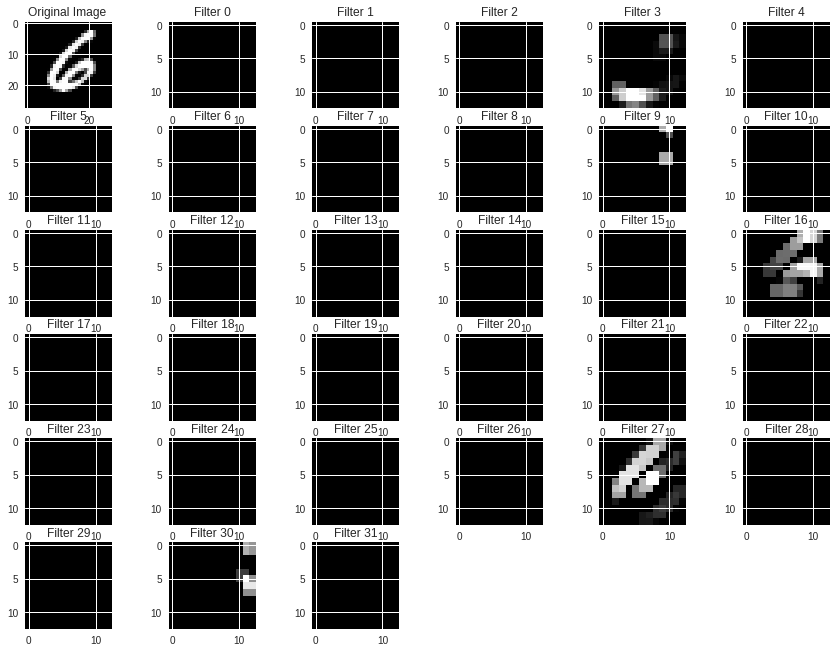

In [0]:
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt


def plot_nn_filter(image, units):
    filters = units.shape[3]
    
    plt.figure(1, figsize=(15,15))
    n_columns = 6
    n_rows = np.ceil(filters / n_columns) + 2

    plt.subplot(n_rows, n_columns, 1)
    plt.title('Original Image ')
    plt.imshow(x_batch[0,:,:,0], interpolation="nearest", cmap="gray")
    
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+2)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        
batch_size = 1
lr = 1e-3

# CREATE GRAPH
alexnet_graph = tf.Graph()
with alexnet_graph.as_default():
    def get_dense_hidden_layer(x_temp, in_shape=0, out_shape=0):
        W_temp = tf.Variable(tf.truncated_normal([in_shape, out_shape], mean=0.0, stddev=1.0, dtype=tf.float32))
        b_temp = tf.Variable(tf.zeros(out_shape, dtype = tf.float32))
        return tf.nn.relu(tf.add(tf.matmul(x_temp, W_temp), b_temp))
    
    def get_conv_layer(x_temp, filters=None, strides=None, padding='SAME', name=None):
        conv_temp = tf.nn.conv2d(input=x_temp, filter=tf.Variable(tf.truncated_normal(filters, mean=0.0, stddev=0.01, dtype=tf.float32)), strides=strides, padding=padding, name=name)
        conv_temp = tf.nn.bias_add(conv_temp, tf.Variable(tf.constant(0.0, shape=[filters[-1]])), name=name+'_bias')
        return conv_temp
    
    with tf.name_scope("placeholders"):
        x = tf.placeholder(name="x",
                        shape=(None, 28, 28, 1),
                        dtype=tf.float32)
        y = tf.placeholder(name="y",
                        shape=(None, 10),
                        dtype=tf.float32)
    
    with tf.name_scope("Hidden-Conv-Layers"):
        # 1st Conv Layer
        conv1 = get_conv_layer(x, filters=[5,5,1,32], strides=[1,1,1,1], padding='SAME', name='conv1')
        conv1 = tf.nn.relu(conv1)
        conv1 = tf.nn.max_pool(conv1, ksize=[1,3,3,1], strides=[1,2,2,1], padding='VALID')
        
        # 2nd Conv Layer
        conv2 = get_conv_layer(conv1, filters=[5,5,32,64], strides=[1,1,1,1], padding='SAME', name='conv2')
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1], strides=[1,2,2,1], padding='VALID')
        
  
    with tf.name_scope("Hidden-Dense-Layers"):            
        flatten = tf.reshape(conv2, [-1, 6*6*64])
        fc1 = get_dense_hidden_layer(flatten, in_shape=6*6*64, out_shape=1000)
        fc2 = get_dense_hidden_layer(fc1, in_shape=1000, out_shape=128)
        
        
    with tf.name_scope("Output-Layer"):
        W = tf.Variable(tf.truncated_normal([128, 10], mean=0.0, stddev=1.0, dtype=tf.float32), name="W")
        b = tf.Variable(tf.zeros(10, dtype = tf.float32), name="b")
        logits = tf.add(tf.matmul(fc2, W), b)
   
    loss_for_each_sample = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y) 
    loss = tf.reduce_mean(loss_for_each_sample)
    optimizer = tf.train.AdamOptimizer(lr).minimize(loss) # Try Adam with bigger lr

    
# CREATE A SESSION TO RUN THE GRAPH
with tf.Session(graph=alexnet_graph) as sess:
    sess.run(tf.initialize_all_variables())
    
    ckpt = tf.train.get_checkpoint_state('my_model_dir')
    print(ckpt.model_checkpoint_path)
    
    saver = tf.train.Saver()
    saver.restore(sess, ckpt.model_checkpoint_path)
        
    x_batch , y_batch = mnist.test.next_batch(batch_size)
    x_batch = x_batch.reshape(x_batch.shape[0], 28, 28, 1)
    conv1_results, conv2_results  = sess.run([conv1, conv2], feed_dict={x: x_batch, y: y_batch})
    
    plot_nn_filter(x_batch, conv1_results)
    

In [0]:
x_batch.shape

(1, 28, 28, 1)